<a href="https://colab.research.google.com/github/silvererudite/simulationAndModeling/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random

In [2]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

table = data[0]
corrected_table = table[0:]
tickers = corrected_table['Symbol'].tolist()

# pull Adjusted closing prices with Pandas datareader and check the head of this data

random_selection = ['ETSY', 'NWSA', 'APTV', 'SWK', 'RJF']

data = pd.DataFrame()

for item in random_selection:
    data[item] = web.DataReader(item, data_source='yahoo', start='15-09-2016')['Adj Close']

data.head()

,ETSY,NWSA,APTV,SWK,RJF
Date,,,,,
2016-09-15,13.63,12.835441,55.422417,112.600578,53.800987
2016-09-16,13.57,12.835441,55.951706,111.431709,52.826019
2016-09-19,13.36,12.816619,55.791313,112.489258,52.919765
2016-09-20,13.51,12.901311,55.213924,113.138618,53.407249
2016-09-21,14.54,13.108335,55.751225,113.648842,54.166599


##Question

The dataset given is from a popular stock market which is called S&P 500 where these 5 stocks are specifically chosen because of some valuable features.

Consider that the stock **ETSY** and **APTV** have a very strong correlation and fluctuates with having a similar change. Right now your task would be determining the change occurs in stock **APTV** due to change in stock **ETSY**. 

>Use scipy function to interpolate the data and get the value of **APTV** when the value of **ETSY** is 73.76

>Now use Sklearn to implement Linear Regression and find the Intercept, Coefficient and calculate y_pred over a few random generated data (x_pred > 150)

>Finally, determine the goodness of fit of your Linear Regression to this problem.

In [4]:
xdata = data['ETSY']
xdata.shape

(1050,)

In [7]:
import scipy 
from scipy import interpolate
import matplotlib.pyplot as plt
ydata = data['APTV']
f = interpolate.interp1d(xdata, ydata)

xnew = 73.76
ynew = f(xnew)

ynew

array(73.18944496)

A graph of the relation between the two stocks

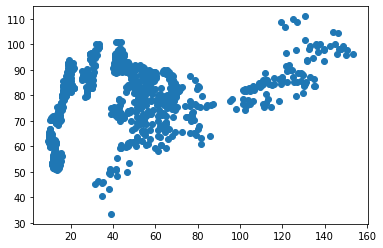

In [8]:
plt.plot(xdata, ydata, 'o', xnew, ynew, '-')
plt.show()

Linear Regression

In [26]:
X = xdata.values.reshape(-1, 1) #reshaping to 2D
y = ydata.values.reshape(-1, 1) #reshaping to 2D
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print("Goodness of fit",reg.score(X, y))

print("Coefficient:", reg.coef_)

print("Intercept",reg.intercept_)

reg.predict([[170],[181]])

Goodness of fit 0.15966954150729984
Coefficient: [[0.15943334]]
Intercept [70.82846455]


array([[97.93213174],
       [99.68589845]])